In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170508288/170498071 [==============================] - 4599s 27us/step


In [5]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

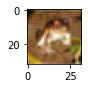

In [6]:
plot_sample(0)

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [10]:
x_train_scalled = x_train/255
x_test_scalled = x_test/255

In [14]:
# this is one hot encoding where instead of number 6 we created an array where sixth position is 1 and other positions are zero
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = "float32"
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = "float32"
)

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = "relu"),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(
    optimizer = "SGD",   #SGD = stochastic gradient descent
    loss = "categorical_crossentropy", #used when one hot encoded output is there, use sparse_categorical_crossentropy for discrete values
    metrics = ["accuracy"]
)

model.fit(x_train_scalled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 83s 53ms/step - loss: 1.8155 - accuracy: 0.3551
Epoch 2/50
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6249 - accuracy: 0.4275
Epoch 3/50
1563/1563 [==============================] - 107s 68ms/step - loss: 1.5409 - accuracy: 0.4574
Epoch 4/50
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4846 - accuracy: 0.4776
Epoch 5/50
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4313 - accuracy: 0.4953
Epoch 6/50
1563/1563 [==============================] - 57s 36ms/step - loss: 1.3924 - accuracy: 0.5115
Epoch 7/50
1563/1563 [==============================] - 58s 37ms/step - loss: 1.3537 - accuracy: 0.5228
Epoch 8/50
1563/1563 [==============================] - 59s 37ms/step - loss: 1.3185 - accuracy: 0.5360
Epoch 9/50
1563/1563 [==============================] - 60s 38ms/step - loss: 1.2849 - accuracy: 0.5490
Epoch 10/50
1563/1563 [==============================] - 59s 38

In [22]:
np.argmax(model.predict(x_train_scalled)[0])

6

In [26]:
classes[y_train[0][0]]

'frog'

In [27]:
def plot_sample_test(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_test[index])

In [28]:
classes[np.argmax(model.predict(x_test_scalled)[0])]

'cat'

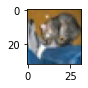

In [29]:
plot_sample_test(0)

NameError: name 'tf' is not defined